In [177]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima

In [184]:
preInternData = pd.read_csv("preLocal.csv")
preInternData.shape

(98, 14)

In [179]:
preInternData["sum"] = preInternData.sum(axis=1)

preInternData.head()

,Week,Bar: (Worldwide),Music festival: (Worldwide),Ticket: (Worldwide),Amusement park: (Worldwide),Park: (Worldwide),Adventure: (Worldwide),Cycling: (Worldwide),Google Maps: (Worldwide),Airbnb: (Worldwide),Car rental: (Worldwide),Camping: (Worldwide),Lake: (Worldwide),Festival: (Worldwide),sum
0,4/29/2018,45,2,89,5,71,5,9,94,24,22,50,59,68,543
1,5/6/2018,42,2,81,4,59,5,9,95,24,21,46,59,59,506
2,5/13/2018,43,2,78,4,58,5,9,100,24,21,49,60,62,515
3,5/20/2018,42,2,78,4,64,5,10,93,24,22,53,69,66,532
4,5/27/2018,45,3,84,5,68,5,9,94,25,23,55,78,72,566


In [180]:
# Let us extract our data to a new data frame.
newInternNewdf = preInternData[['Week', 'sum']]

Text(0, 0.5, 'Travel-Related Searches')

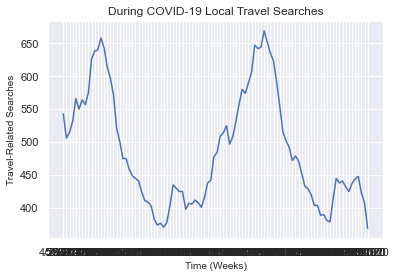

In [181]:
p = sns.lineplot(data=newInternNewdf, y="sum", x="Week")
p.set_title("During COVID-19 Local Travel Searches")
p.set_xlabel("Time (Weeks)", fontsize = 10)
p.set_ylabel("Travel-Related Searches", fontsize = 10)

In [185]:
rolling_mean = newInternNewdf["sum"].rolling(5).mean()
rolling_std = newInternNewdf["sum"].rolling(5).std()

# print(rolling_mean)
# print(rolling_std)

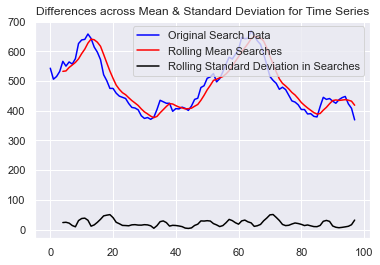

In [186]:
plt.plot(newInternNewdf["sum"], color="blue",label="Original Search Data")
plt.plot(rolling_mean, color="red", label= "Rolling Mean Searches")
plt.plot(rolling_std, color="black", label = "Rolling Standard Deviation in Searches")
plt.title("Differences across Mean & Standard Deviation for Time Series")
plt.legend(loc="best")

In [187]:
adftNewIntern = adfuller(newInternNewdf["sum"], autolag="AIC")

In [188]:
# adftNewIntern = adfuller(newInternNewdf["sum"], autolag="AIC")
output_NewInterndf = pd.DataFrame({"Values":[adftNewIntern[0],adftNewIntern[1],adftNewIntern[2], 
                                    adftNewIntern[3], adftNewIntern[4]['1%'], 
                    adftNewIntern[4]['5%'], adftNewIntern[4]['10%']] , "Metric":["Test Statistics","p-value",
                    "No. of lags used", "Number of observations used", "critical value (1%)",                                          
                    "critical value (5%)", "critical value (10%)"]})

print(output_NewInterndf)

      Values                       Metric
0  -1.690658              Test Statistics
1   0.435932                      p-value
2   2.000000             No. of lags used
3  95.000000  Number of observations used
4  -3.501137          critical value (1%)
5  -2.892480          critical value (5%)
6  -2.583275         critical value (10%)


In [190]:
autocorrelation_lag1 = newInternNewdf['sum'].autocorr(lag=1)
                          
print("One Month Lag: ", autocorrelation_lag1)

One Month Lag:  0.9741741716326817


In [191]:
autocorrelation_lag3 = newInternNewdf['sum'].autocorr(lag=3)
                          
print("Three Month Lag: ", autocorrelation_lag3)

autocorrelation_lag6 = newInternNewdf['sum'].autocorr(lag=6)
                          
print("Six Month Lag: ", autocorrelation_lag6)

autocorrelation_lag9 = newInternNewdf['sum'].autocorr(lag=9)
                          
print("Nine Month Lag: ", autocorrelation_lag9)

Three Month Lag:  0.868502319602359
Six Month Lag:  0.6359129128495713
Nine Month Lag:  0.3612926619954234


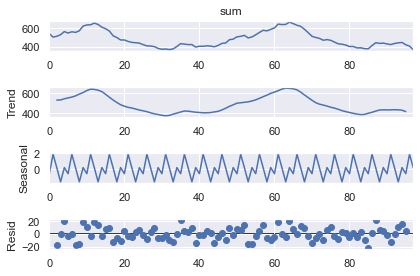

In [192]:
decompose = seasonal_decompose(newInternNewdf['sum'],model='additive', period=5)

decompose.plot()
plt.show()

In [193]:
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)

model.fit(train)

forecast = model.predict(n_periods=len(test))

forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=796.360, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1039.662, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=799.976, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1294.579, Time=0.00 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=792.288, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=794.877, Time=0.06 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=787.962, Time=0.17 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=787.349, Time=0.20 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=776.981, Time=0.27 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=791.463, Time=0.26 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec


<ipython-input-194-5e554eb92aba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newInternNewdf['Week'] = newInternNewdf.index
<ipython-input-194-5e554eb92aba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['train'] = train['sum']
<ipython-input-194-5e554eb92aba>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

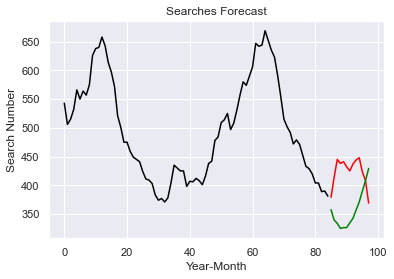

In [194]:
newInternNewdf['Week'] = newInternNewdf.index
train = newInternNewdf[newInternNewdf['Week'] < 85]

train['train'] = train['sum']

del train['Week']

del train['sum']

test = newInternNewdf[newInternNewdf['Week'] >= 85]

del test['Week']

test['train'] = test['sum']

del test['sum']

plt.plot(train, color="black")

plt.plot(test, color="red")

plt.plot(forecast, color="green")

plt.title("Searches Forecast")

plt.ylabel("Search Number")

plt.xlabel('Year-Month')

sns.set()

plt.show()

In [195]:
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(test,forecast))

print("RMSE: ", rms)

RMSE:  83.55777995173003


In [ ]:
prerolling_mean = newdf["sum"]
prerolling_std = newdf["sum"]

In [ ]:
aftrolling_mean = newdf["sum"]
aftrolling_std = newdf["sum"]